In [1]:
import numpy as np
from matplotlib import pyplot as plt
#import h5py

import time, os, re, sys

from sklearn import utils
from sklearn import model_selection 
from sklearn import preprocessing
from sklearn import metrics

from sklearn.model_selection import train_test_split, ParameterGrid

# K-fold validation
from sklearn.model_selection import RepeatedStratifiedKFold

# PCA
from sklearn.decomposition import PCA

# Scoring
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import roc_curve, auc
from sklearn import metrics

# Classificatori
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import imblearn
import pandas as pd

In [2]:
dati = np.load("../Dataset/dati.npz")
X = dati["X"]
y = dati["y"]
X_df = pd.read_csv("../Dataset/Dati_df")
col_names = X_df.columns 

In [3]:

oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = oversample.fit_resample(X, y)

tot_data = y_over.shape[0]
tot_n = tot_data - sum(y_over)
percent_n = tot_n/tot_data*100

tot_y = sum(y_over)
percent_y = tot_y/tot_data*100


print(f"Oversampling: {y.shape[0]} --> {tot_data} = Aumento del {(tot_data-y.shape[0])/y.shape[0]*100:.2f}%")
print(f"Pha = 'N' --> {tot_n } su {tot_data} => {percent_n:.2f}%")
print(f"Pha = 'Y' --> {tot_y } su {tot_data} => {percent_y:.2f}%")


Oversampling: 820572 --> 1227835 = Aumento del 49.63%
Pha = 'N' --> 818557 su 1227835 => 66.67%
Pha = 'Y' --> 409278 su 1227835 => 33.33%


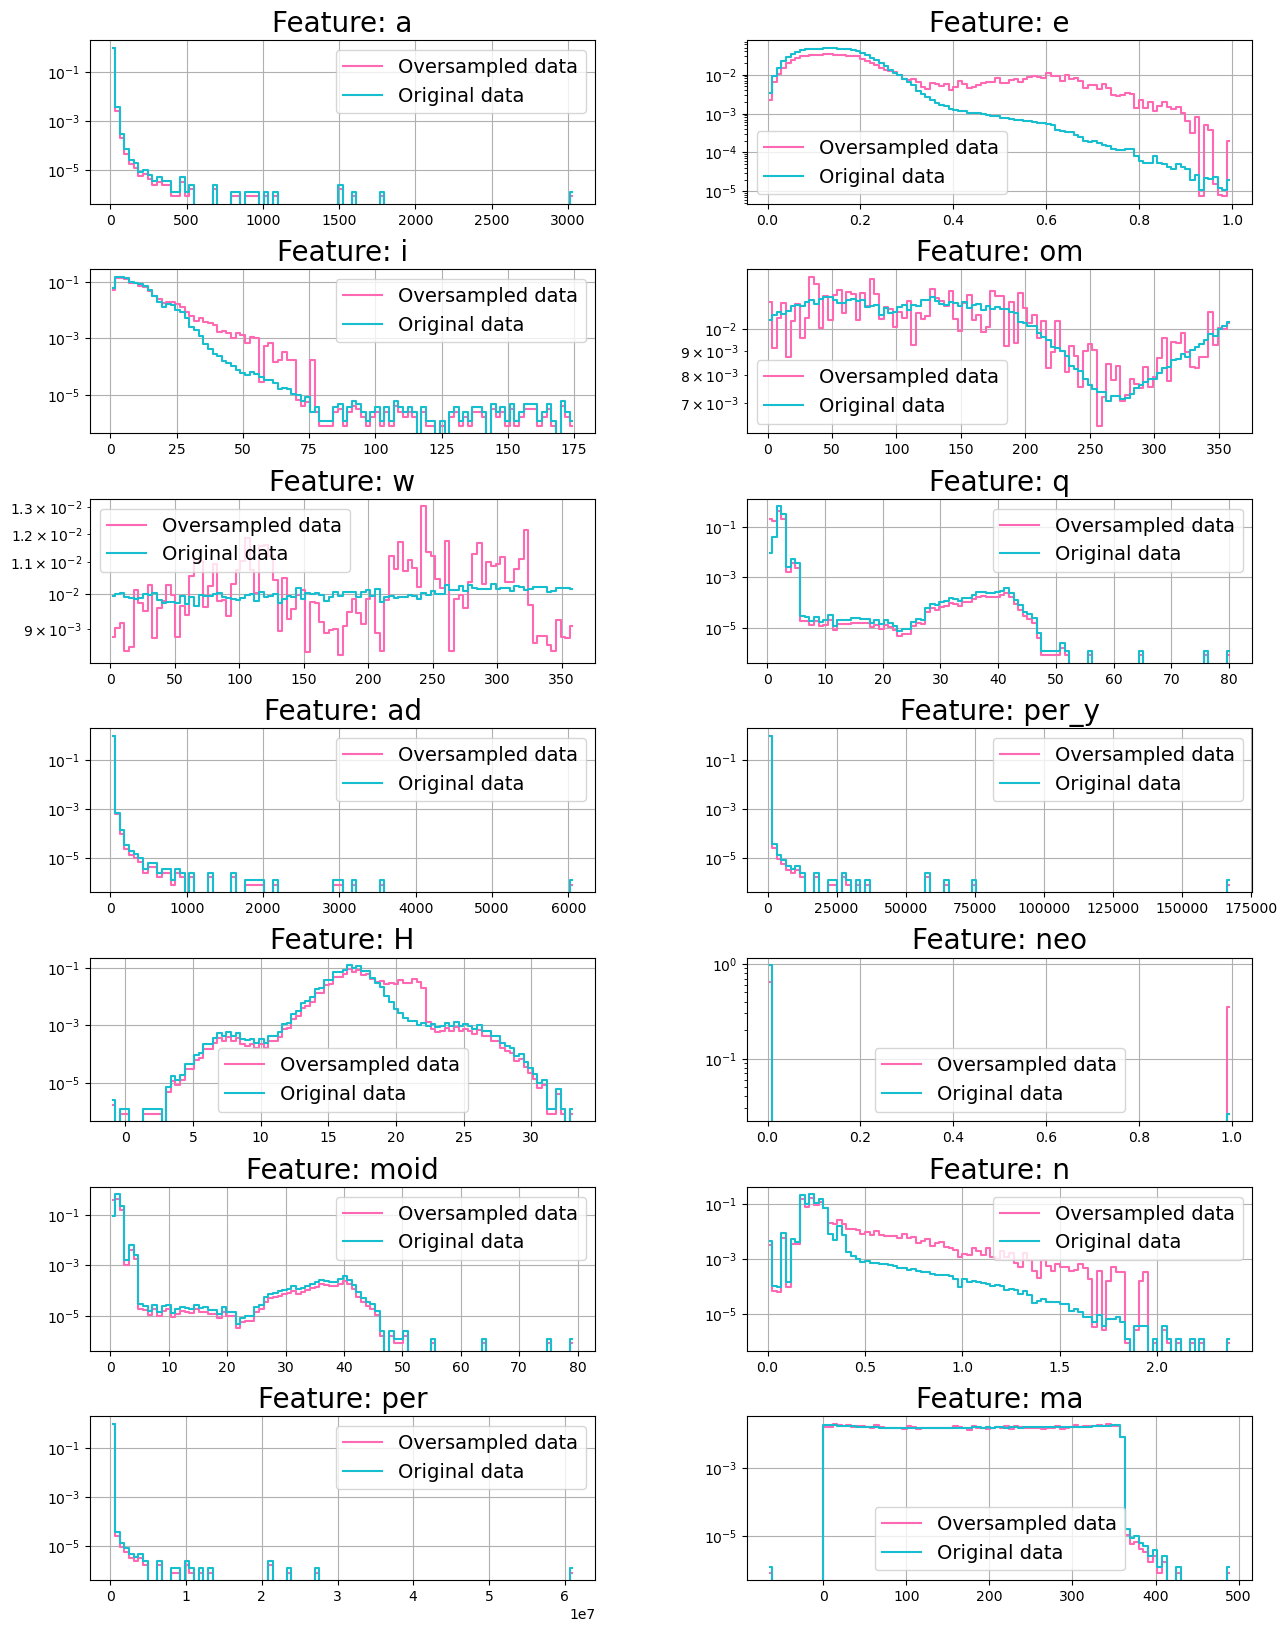

In [4]:
fig, ax = plt.subplots(7, 2)
fig.set_size_inches(15,20)
fig.subplots_adjust(hspace = .4, wspace = .3)
ax = ax.flatten()

for i in range(X.shape[1]):
    h, bins = np.histogram(X_over[:,i], bins = 100)
    binc = bins[:-1] + (bins[1] - bins[0])/2
    ax[i].plot(binc, h/np.sum(h), ds = "steps-mid", label = "Oversampled data", c = "hotpink")
    #ax[i].fill_between(binc, h, step = "mid", color = "lime", alpha = 1)
    
    h, bins = np.histogram(X[:,i], bins = 100)
    binc = bins[:-1] + (bins[1] - bins[0])/2
    ax[i].plot(binc, h/np.sum(h), ds = "steps-mid", label = "Original data", c = "tab:cyan")
    #ax[i].fill_between(binc, h, step = "mid", color = "lime", alpha = 1)
    
    ax[i].set_yscale("log")
    

    
    
    ax[i].grid()
    ax[i].legend(fontsize = 14)
    ax[i].set_title(f"Feature: {col_names[i]}", fontsize = 20)
    
    
plt.show()

In [5]:
undersample  = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=0.5)
X_under, y_under = undersample.fit_resample(X, y)

tot_data = y_under.shape[0]
tot_n = tot_data - sum(y_under)
percent_n = tot_n/tot_data*100

tot_y = sum(y_under)
percent_y = tot_y/tot_data*100

print(f"Undersampling: {y.shape[0]} --> {tot_data} = Diminuzione del {(tot_data-y.shape[0])/y.shape[0]*100:.2f}%")
print(f"Pha = 'N' --> {tot_n } su {tot_data} => {percent_n:.2f}%")
print(f"Pha = 'Y' --> {tot_y } su {tot_data} => {percent_y:.2f}%")


Undersampling: 820572 --> 6045 = Diminuzione del -99.26%
Pha = 'N' --> 4030 su 6045 => 66.67%
Pha = 'Y' --> 2015 su 6045 => 33.33%


In [6]:
...
# define oversampling strategy
over = imblearn.over_sampling.RandomOverSampler(sampling_strategy=0.1)
# fit and apply the transform
X_o, y_o = over.fit_resample(X, y)
# define undersampling strategy
under = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_ou, y_ou = under.fit_resample(X_o, y_o)

tot_data = y_ou.shape[0]
tot_n = tot_data - sum(y_ou)
percent_n = tot_n/tot_data*100

tot_y = sum(y_ou)
percent_y = tot_y/tot_data*100

print(f"Oversampling: {y.shape[0]} --> {tot_data} = Diminuzione del {(tot_data-y.shape[0])/y.shape[0]*100:.2f}%")
print(f"Pha = 'N' --> {tot_n } su {tot_data} => {percent_n:.2f}%")
print(f"Pha = 'Y' --> {tot_y } su {tot_data} => {percent_y:.2f}%")


Oversampling: 820572 --> 245565 = Diminuzione del -70.07%
Pha = 'N' --> 163710 su 245565 => 66.67%
Pha = 'Y' --> 81855 su 245565 => 33.33%


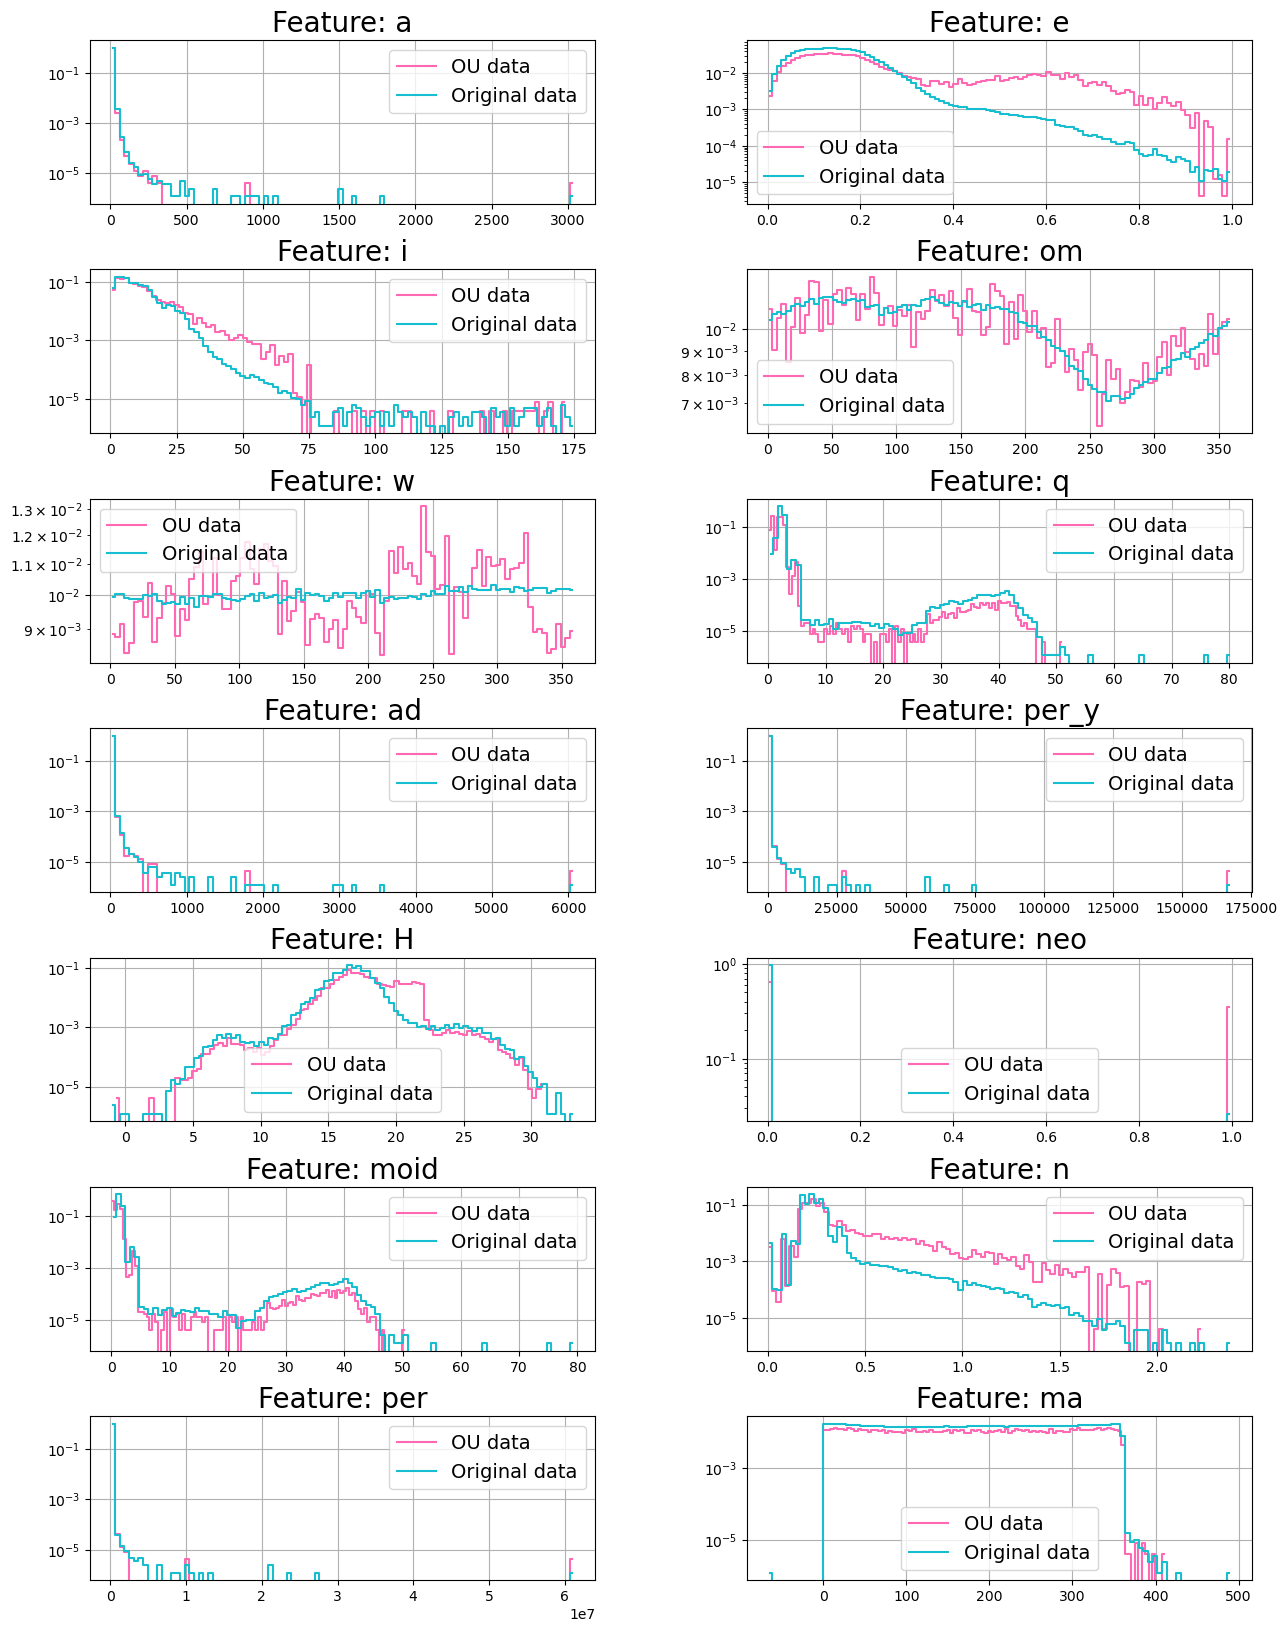

In [7]:
fig, ax = plt.subplots(7, 2)
fig.set_size_inches(15,20)
fig.subplots_adjust(hspace = .4, wspace = .3)
ax = ax.flatten()

for i in range(X.shape[1]):
    h, bins = np.histogram(X_ou[:,i], bins = 100)
    binc = bins[:-1] + (bins[1] - bins[0])/2
    ax[i].plot(binc, h/np.sum(h), ds = "steps-mid", label = "OU data", c = "hotpink")
    #ax[i].fill_between(binc, h, step = "mid", color = "lime", alpha = 1)
    
    h, bins = np.histogram(X[:,i], bins = 100)
    binc = bins[:-1] + (bins[1] - bins[0])/2
    ax[i].plot(binc, h/np.sum(h), ds = "steps-mid", label = "Original data", c = "tab:cyan")
    #ax[i].fill_between(binc, h, step = "mid", color = "lime", alpha = 1)
    
    ax[i].set_yscale("log")
    

    
    
    ax[i].grid()
    ax[i].legend(fontsize = 14)
    ax[i].set_title(f"Feature: {col_names[i]}", fontsize = 20)
    
    
plt.show()

In [8]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

tot_data = y_smote.shape[0]
tot_n = tot_data - sum(y_smote)
percent_n = tot_n/tot_data*100

tot_y = sum(y_smote)
percent_y = tot_y/tot_data*100

print(f"smote: {y.shape[0]} --> {tot_data} = Aumento del {(tot_data-y.shape[0])/y.shape[0]*100:.2f}%")
print(f"Pha = 'N' --> {tot_n } su {tot_data} => {percent_n:.2f}%")
print(f"Pha = 'Y' --> {tot_y } su {tot_data} => {percent_y:.2f}%")


smote: 820572 --> 1637114 = Aumento del 99.51%
Pha = 'N' --> 818557 su 1637114 => 50.00%
Pha = 'Y' --> 818557 su 1637114 => 50.00%


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


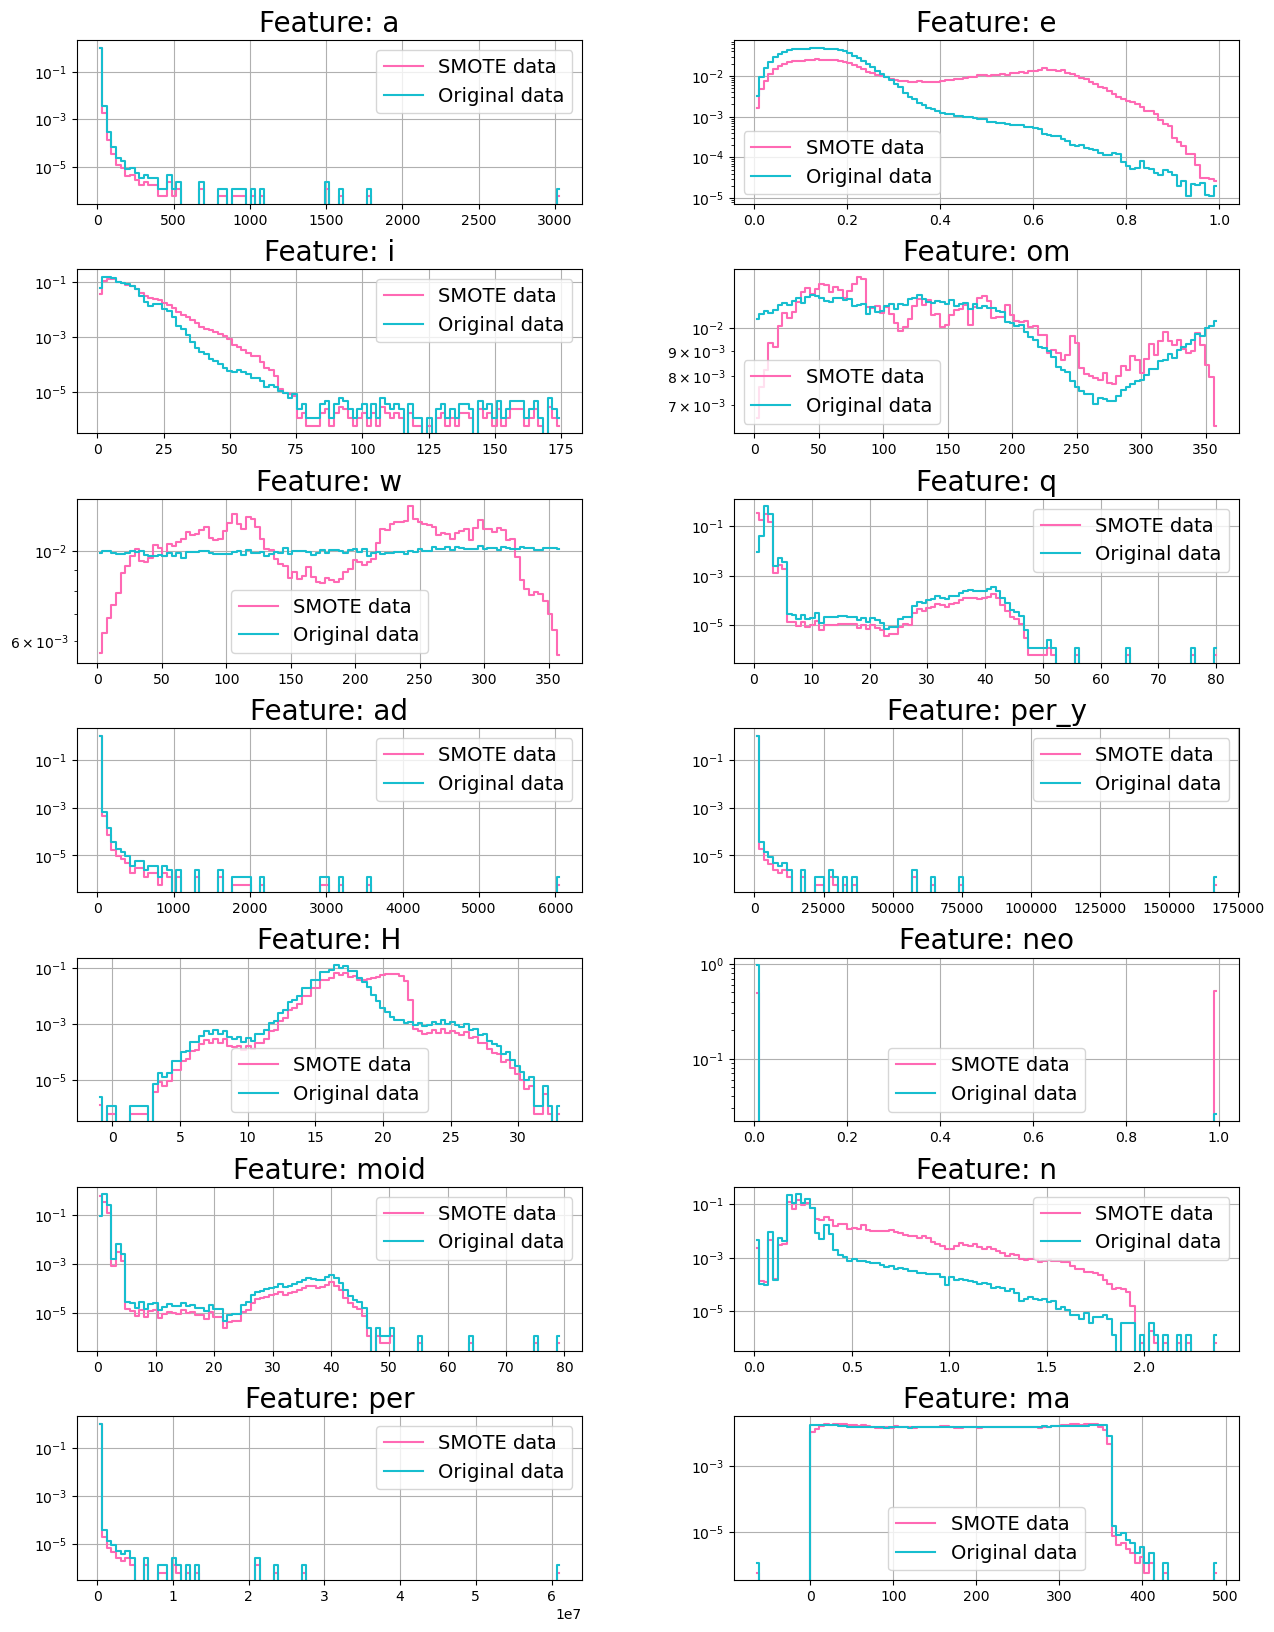

In [9]:
fig, ax = plt.subplots(7, 2)
fig.set_size_inches(15,20)
fig.subplots_adjust(hspace = .4, wspace = .3)
ax = ax.flatten()

for i in range(X.shape[1]):
    h, bins = np.histogram(X_smote[:,i], bins = 100)
    binc = bins[:-1] + (bins[1] - bins[0])/2
    ax[i].plot(binc, h/np.sum(h), ds = "steps-mid", label = "SMOTE data", c = "hotpink")
    #ax[i].fill_between(binc, h, step = "mid", color = "lime", alpha = 1)
    
    h, bins = np.histogram(X[:,i], bins = 100)
    binc = bins[:-1] + (bins[1] - bins[0])/2
    ax[i].plot(binc, h/np.sum(h), ds = "steps-mid", label = "Original data", c = "tab:cyan")
    #ax[i].fill_between(binc, h, step = "mid", color = "lime", alpha = 1)
    
    ax[i].set_yscale("log")
    

    
    
    ax[i].grid()
    ax[i].legend(fontsize = 14)
    ax[i].set_title(f"Feature: {col_names[i]}", fontsize = 20)
    
fig.savefig("../Relazione/Grafici/SMOTED.eps", format = 'eps')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


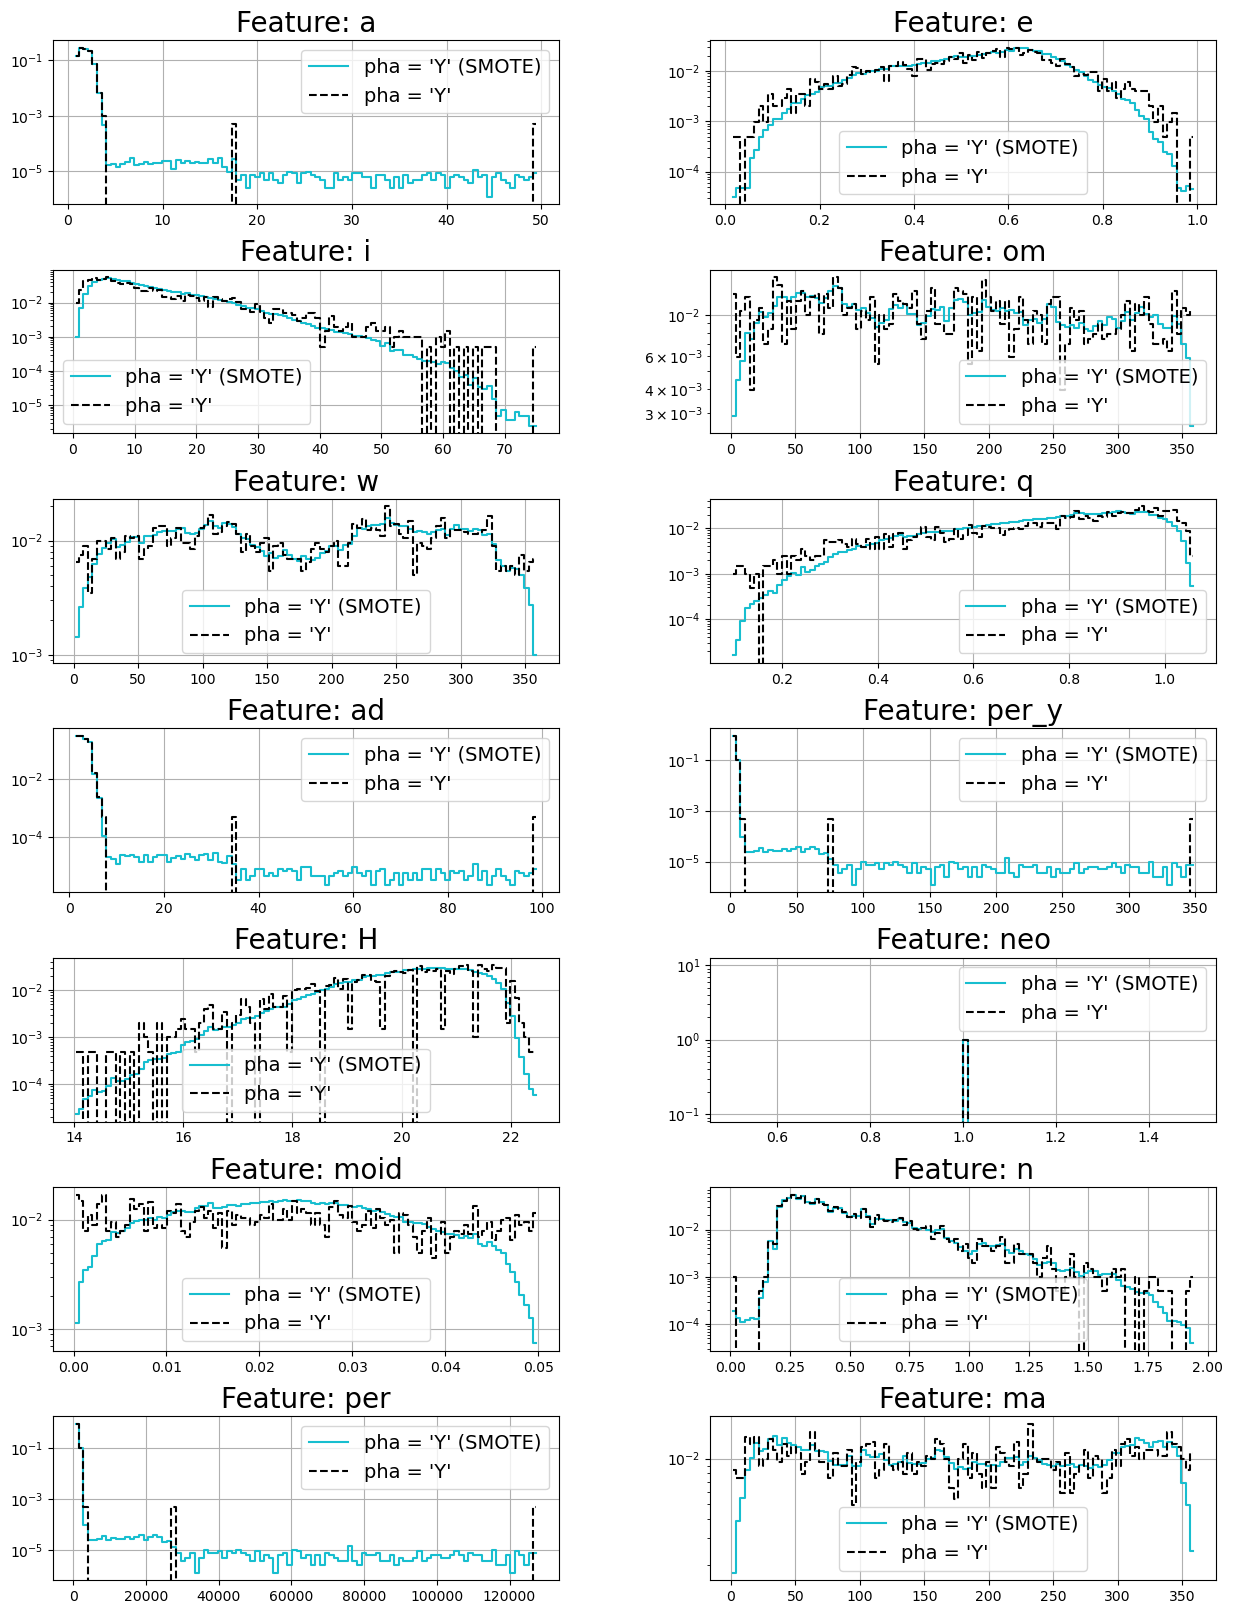

In [12]:
fig, ax = plt.subplots(7, 2)
fig.set_size_inches(15,20)
fig.subplots_adjust(hspace = .4, wspace = .3)
ax = ax.flatten()

for i in range(X.shape[1]):

    h, bins = np.histogram(X_smote[:,i][y_smote==1], bins = 100)
    binc = bins[:-1] + (bins[1] - bins[0])/2
    ax[i].plot(binc, h/np.sum(h), ds = "steps-mid", label = "pha = 'Y' (SMOTE)", c = "tab:cyan")
    #ax[i].fill_between(binc, h, step = "mid", color = "lime", alpha = 1)
    
    h, bins = np.histogram(X[:,i][y==1], bins = 100)
    binc = bins[:-1] + (bins[1] - bins[0])/2
    ax[i].plot(binc, h/np.sum(h), ds = "steps-mid", label = "pha = 'Y'", c = "k", ls = '--')

    ax[i].set_yscale("log")
    

    
    
    ax[i].grid()
    ax[i].legend(fontsize = 14)
    ax[i].set_title(f"Feature: {col_names[i]}", fontsize = 20)

fig.savefig("../Relazione/Grafici/SMOTED_YN.eps", format = 'eps')

plt.show()

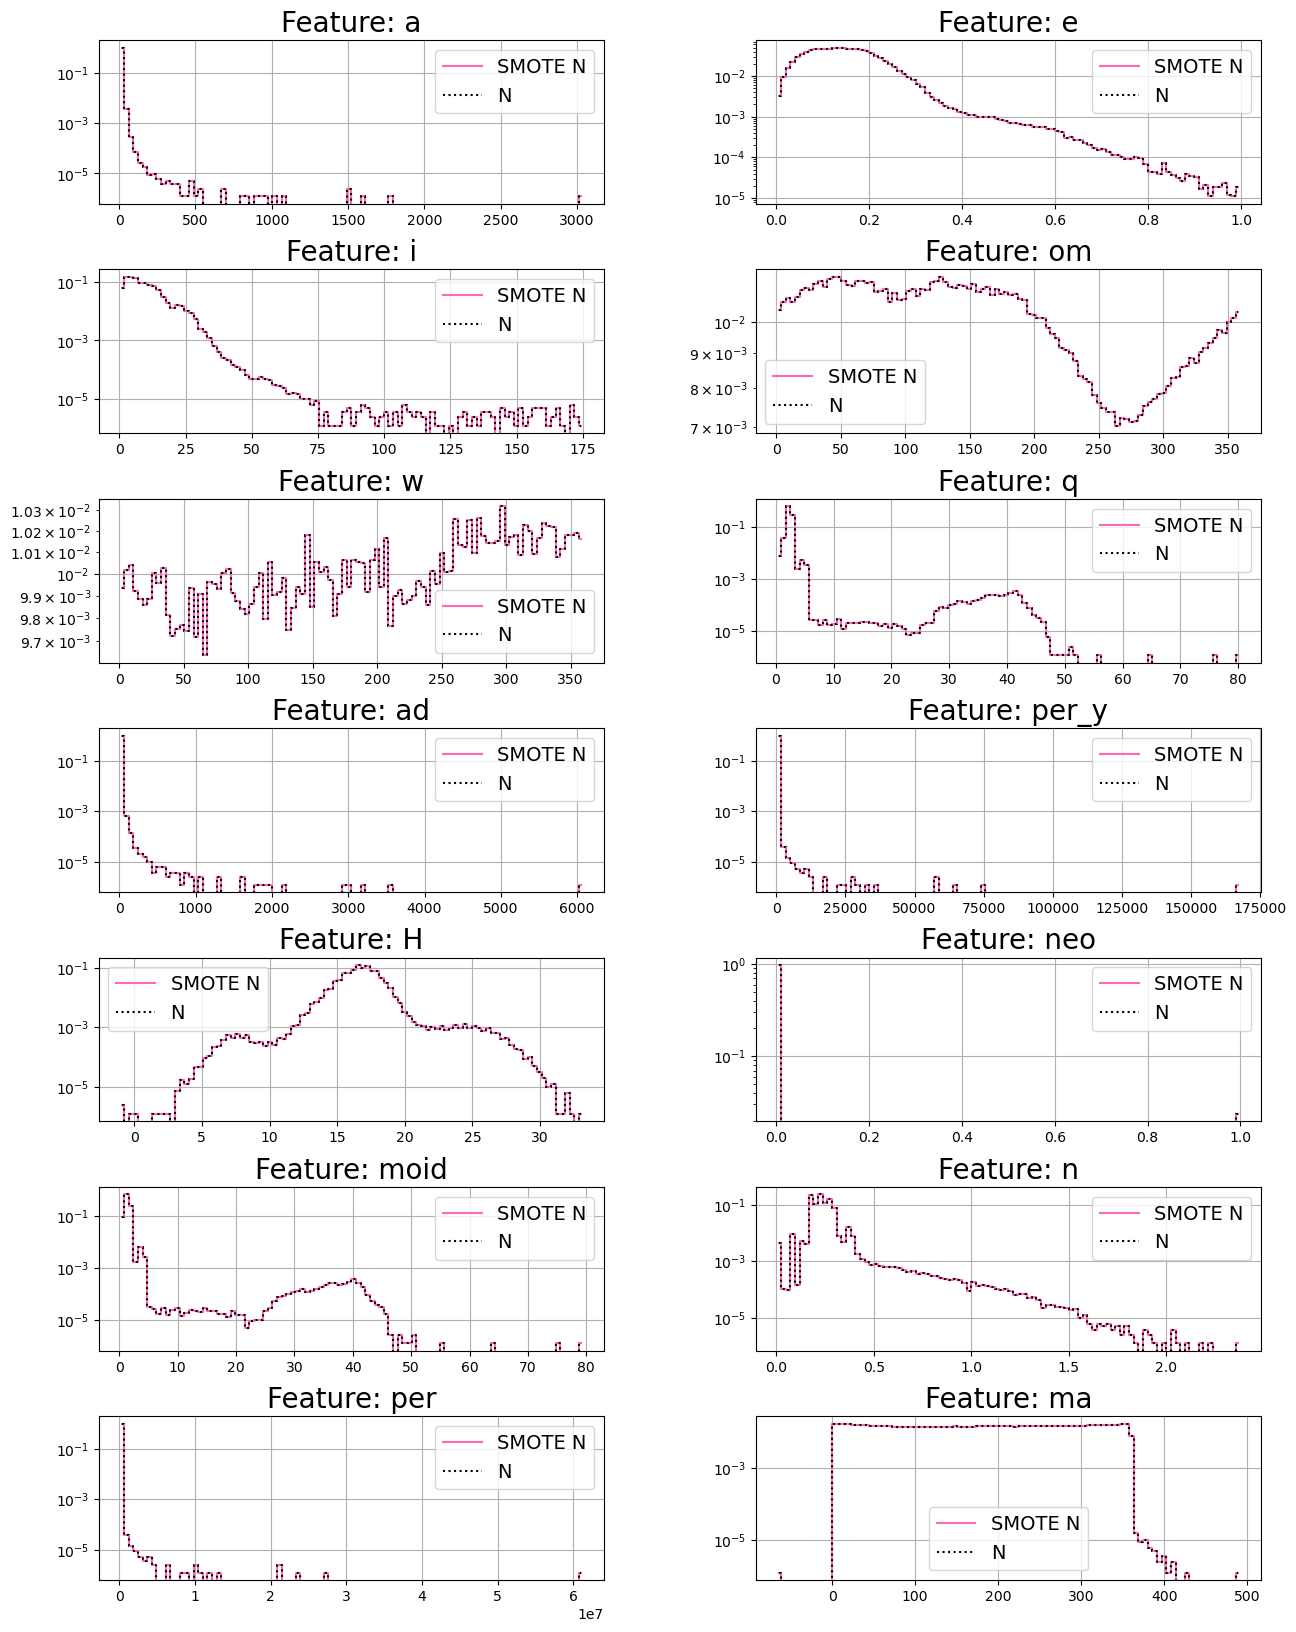

In [11]:
fig, ax = plt.subplots(7, 2)
fig.set_size_inches(15,20)
fig.subplots_adjust(hspace = .4, wspace = .3)
ax = ax.flatten()

for i in range(X.shape[1]):
    h, bins = np.histogram(X_smote[:,i][y_smote==0], bins = 100)
    binc = bins[:-1] + (bins[1] - bins[0])/2
    ax[i].plot(binc, h/np.sum(h), ds = "steps-mid", label = "SMOTE N", c = "hotpink")
    #ax[i].fill_between(binc, h, step = "mid", color = "lime", alpha = 1)
    
    h, bins = np.histogram(X[:,i][y==0], bins = 100)
    binc = bins[:-1] + (bins[1] - bins[0])/2
    ax[i].plot(binc, h/np.sum(h), ds = "steps-mid", label = "N", c = "k", ls = ':')
    #ax[i].fill_between(binc, h, step = "mid", color = "lime", alpha = 1)
    

    ax[i].set_yscale("log")
    

    
    
    ax[i].grid()
    ax[i].legend(fontsize = 14)
    ax[i].set_title(f"Feature: {col_names[i]}", fontsize = 20)


plt.show()